# 🔐 Proyecto: Sistema Educativo de Seguridad de Contraseñas con Tokenización y Cifrado

## Systems Ingenerie Christian Salazar - 3186182692
## 📄 Descripción

Este proyecto es una aplicación educativa diseñada para enseñar a los usuarios sobre buenas prácticas en la creación y gestión de contraseñas. Incluye:

- Evaluación de contraseñas
- Generación de tokens seguros
- Métodos de cifrado (César y Vigenère)
- Simulación de ataques de fuerza bruta

Su propósito es fomentar la conciencia en ciberseguridad mediante aprendizaje interactivo.


## 🎯 Objetivos

### ✅ Objetivo General
Desarrollar una aplicación educativa que permita a los usuarios fortalecer sus contraseñas mediante tokenización, cifrado y evaluación de seguridad.

### ✅ Objetivos Específicos
1. Implementar un sistema de generación de tokens seguros.
2. Aplicar algoritmos de cifrado (César y Vigenère).
3. Desarrollar una interfaz intuitiva para educar sobre contraseñas seguras.
4. Simular ataques de fuerza bruta como método de concientización.
5. Fomentar el uso de buenas prácticas en la gestión de contraseñas.

## 🔍 Evaluación de Contraseñas

Este módulo permite evaluar la seguridad de una contraseña, analizando los siguientes criterios:

- Longitud mínima de 8 caracteres.
- Presencia de minúsculas.
- Presencia de mayúsculas.
- Inclusión de números.
- Uso de caracteres especiales.
- Verifica que no contenga palabras comunes en inglés.
- Verifica que no contenga nombres propios comunes.

### 🔧 Funcionamiento:
La función `is_valid_password()` retorna un diccionario con los criterios cumplidos y un nivel de seguridad categorizado en:

- **Weak (Débil)**
- **Strong (Fuerte)**
- **Very Strong (Muy Fuerte)**

> Esta función utiliza recursos de la biblioteca `nltk` para verificar palabras y nombres comunes, fortaleciendo la evaluación semántica de la contraseña.

In [ ]:
 # 🔐 Evaluación de Contraseñas

import nltk
from nltk.corpus import words, names
import string
import re

# Descargar datasets necesarios
nltk.download("words")
nltk.download("names")

def is_valid_password(password):
    criteries = {
        "length": len(password) >= 8,
        "lowercase": any(c.islower() for c in password),
        "uppercase": any(c.isupper() for c in password),
        "digit": any(c.isdigit() for c in password),
        "special_char": any(c in string.punctuation for c in password),
        "common_words": False,
        "common_names": False,
    }

    common_words = set(words.words())
    common_names = set(n.lower() for n in names.words())

    for part in re.findall(r"[a-zA-Z]+", password):
        if part.lower() in common_words:
            criteries["common_words"] = True
        if part.lower() in common_names:
            criteries["common_names"] = True

    score = sum(v for v in criteries.values() if v is True)

    if score >= 6:
        level = "Very Strong"
    elif score >= 4:
        level = "Strong"
    else:
        level = "Weak"

    return criteries, level


# ✅ Ejemplo de uso
criterios, nivel = is_valid_password("P@ssword123")
print("Criterios evaluados:", criterios)
print("Nivel de seguridad:", nivel)


## 🔑 Generación de Tokens Compuestos

Este módulo permite crear tokens seguros y personalizados combinando caracteres de una contraseña con caracteres adicionales proporcionados por el usuario.

### 🚀 Funciones Principales:

- **tokenize_password(password)**: Convierte una contraseña en una lista de caracteres individuales (tokens).
- **tokenize_text(text)**: Convierte cualquier texto en una lista de caracteres.
- **combinar_por_letra(tokens_base, tokens_extra)**: Combina cada carácter de la contraseña con caracteres extra usando modos aleatorios de combinación.
- **generar_tokens_compuestos(password, text)**: Función principal que genera una lista de tokens combinados entre la contraseña y un texto adicional.

### 🎯 Aplicaciones:
- Creación de contraseñas más robustas.
- Generación de claves, identificadores únicos o tokens para APIs.
- Refuerzo de seguridad al mezclar múltiples fuentes de caracteres.

> Este generador introduce aleatoriedad y combina diferentes conjuntos de caracteres para incrementar la entropía y robustez de las contraseñas o tokens generados.


In [ ]:
# 🔑 Generador de Tokens Compuestos

import random
import string

# Convierte la contraseña en una lista de caracteres
def tokenize_password(password):
    return list(password)

# Convierte cualquier texto en una lista de caracteres
def tokenize_text(text):
    return list(text)

# Combina tokens del password con tokens adicionales
def combinar_por_letra(tokens_base, tokens_extra):
    combinaciones = []
    for letra in tokens_base:
        extra = random.choice(tokens_extra)
        modo = random.choice([1, 2, 3])

        if modo == 1:
            combinado = f"{letra}{extra}"
        elif modo == 2:
            combinado = f"{extra}{letra}"
        else:
            combinado = f"{letra}{extra}{random.choice(tokens_extra)}"

        combinaciones.append(combinado)
    return combinaciones

# Genera tokens compuestos mezclando password y texto adicional
def generar_tokens_compuestos(password, text):
    tokens_base = tokenize_password(password)
    tokens_extra = tokenize_text(text)
    return combinar_por_letra(tokens_base, tokens_extra)

# ✅ Ejemplo de uso
tokens = generar_tokens_compuestos("P@ss123", "9#")
print("Tokens generados:", tokens)


## 🔐 Módulo de Cifrado: César y Vigenère

Este módulo permite aplicar dos métodos clásicos de cifrado: **César** y **Vigenère**, además de una función que realiza un cifrado doble combinando ambos algoritmos.

### 🔑 Funciones Principales:

- **cessar_encrypt(text, displacement=5)**  
  Cifra el texto utilizando el cifrado César. Desplaza letras y números un número determinado de posiciones (por defecto 5).

- **vigenere_encrypt(text, key)**  
  Cifra el texto utilizando el cifrado Vigenère con una clave alfabética. La clave se repite hasta igualar la longitud del texto.

- **double_encrypt(text, key="123", displacement=5)**  
  Realiza un doble cifrado: primero aplica César y luego Vigenère, ofreciendo una capa adicional de seguridad.

### 🛡️ Aplicaciones:
- Enseñar conceptos básicos de cifrado clásico.
- Mostrar cómo los métodos simples son vulnerables si no se combinan con prácticas más robustas.
- Refuerzo educativo sobre cómo funcionan los desplazamientos y claves en criptografía.

> ⚠️ Nota: Estos métodos son educativos y no seguros para aplicaciones en producción. Solo ilustran los principios básicos de la criptografía.


In [ ]:
# 🔐 Funciones de Cifrado y Doble Cifrado

# Cifrado César
def cessar_encrypt(text, displacement=5):
    answer = ""
    for char in text:
        if char.isalpha():
            base = ord("A") if char.isupper() else ord("a")
            answer += chr((ord(char) - base + displacement) % 26 + base)
        elif char.isdigit():
            answer += str((int(char) + displacement) % 10)
        else:
            answer += char
    return answer

# Cifrado Vigenère
def vigenere_encrypt(text, key):
    answer = ""
    repeted_key = (key * ((len(text) // len(key)) + 1))[:len(text)]

    for i, char in enumerate(text):
        if char.isalpha():
            base = ord("A") if char.isupper() else ord("a")
            key_char = repeted_key[i].lower()
            displacement = ord(key_char) - ord("a")
            answer += chr((ord(char) - base + displacement) % 26 + base)
        else:
            answer += char
    return answer

# Doble cifrado: primero César, luego Vigenère
def double_encrypt(text, key="123", displacement=5):
    first_encrypt = cessar_encrypt(text, displacement)
    second_encryption = vigenere_encrypt(first_encrypt, key)
    return second_encryption

# ✅ Ejemplo de uso
texto = "P@ssw0rd123"
cifrado = double_encrypt(texto, key="clave")
print("Texto original:", texto)
print("Texto cifrado:", cifrado)


## ⚔️ Simulación de Ataques de Fuerza Bruta: Cifrado César y Vigenère

Este módulo permite demostrar cómo funcionan los ataques de **fuerza bruta** sobre cifrados clásicos como **César** y **Vigenère**.

### 🔓 Funciones Incluidas:

- **decrypt_cesar(ciphertext, shift)**  
  Desencripta un texto cifrado con el método César usando un desplazamiento específico.

- **force_stroke_cessar(ciphertext, target=None)**  
  Realiza un ataque de fuerza bruta sobre un texto cifrado con César. Prueba los 25 desplazamientos posibles hasta encontrar el texto original o mostrar todos los intentos.

- **decrypt_vigenere(ciphertext, key)**  
  Desencripta un texto cifrado con Vigenère usando una clave específica.

- **force_stroke_vigenere(ciphertext, max_length=2, target=None)**  
  Realiza un ataque de fuerza bruta sobre Vigenère, probando todas las combinaciones posibles de claves hasta la longitud máxima establecida.

### 🎯 Aplicación:
- Educar sobre la vulnerabilidad de los cifrados débiles.
- Mostrar la eficiencia (o ineficiencia) de un ataque de fuerza bruta según la longitud de la clave.

> 🚨 Este ejercicio es exclusivamente educativo. Los cifrados César y Vigenère son inseguros frente a ataques actuales, pero útiles para comprender los principios básicos de criptografía.


In [ ]:
import string
import time
from itertools import product

# 🔓 Descifrado César
def decrypt_cesar(ciphertext, shift):
    result = ""
    for char in ciphertext:
        if char.isalpha():
            base = ord("A") if char.isupper() else ord("a")
            result += chr((ord(char) - base - shift) % 26 + base)
        else:
            result += char
    return result

# ⚔️ Fuerza Bruta César
def force_stroke_cessar(ciphertext, target=None):
    resultados = []
    clave_encontrada = None
    inicio = time.time()

    for d in range(1, 26):
        intento = decrypt_cesar(ciphertext, d)
        resultados.append((d, intento))
        if target and intento.lower() == target.lower():
            clave_encontrada = intento
            break

    fin = time.time()
    return {
        "resultados": resultados,
        "clave_encontrada": clave_encontrada,
        "tiempo": round(fin - inicio, 2),
    }

# 🔓 Descifrado Vigenère
def decrypt_vigenere(ciphertext, key):
    resultado = ""
    key = (key * (len(ciphertext) // len(key) + 1))[:len(ciphertext)]

    for i, char in enumerate(ciphertext):
        if char.isalpha():
            base = ord("A") if char.isupper() else ord("a")
            key_char = key[i].lower()
            shift = ord(key_char) - ord("a")
            resultado += chr((ord(char) - base - shift) % 26 + base)
        else:
            resultado += char
    return resultado

# ⚔️ Fuerza Bruta Vigenère
def force_stroke_vigenere(ciphertext, max_length=2, target=None):
    resultados = []
    clave_encontrada = None
    inicio = time.time()

    alphabet = string.ascii_lowercase
    posibles_claves = [
        "".join(p)
        for l in range(1, max_length + 1)
        for p in product(alphabet, repeat=l)
    ]

    for key in posibles_claves:
        intento = decrypt_vigenere(ciphertext, key)
        resultados.append((key, intento))
        if target and intento.lower() == target.lower():
            clave_encontrada = intento
            break

    fin = time.time()
    return {
        "resultados": resultados,
        "clave_encontrada": clave_encontrada,
        "tiempo": round(fin - inicio, 2),
    }

# ✅ Ejemplo de uso:
texto_cifrado_cesar = "fkulvwldq"
resultado_cesar = force_stroke_cessar(texto_cifrado_cesar)
print("Resultados Fuerza Bruta César:", resultado_cesar)

texto_cifrado_vigenere = "Kfanidqlgtojwrb"
resultado_vigenere = force_stroke_vigenere(texto_cifrado_vigenere, max_length=2)
print("Resultados Fuerza Bruta Vigenère:", resultado_vigenere)


## 🧠 Generador de Contraseñas Mnemotécnicas

Este módulo permite transformar tokens o contraseñas complejas en **frases mnemotécnicas fáciles de recordar**, manteniendo la robustez y complejidad necesaria para la seguridad.

### 🔐 Funciones Incluidas:

- **token_for_word(token)**  
  Convierte un token (cadena de texto) en una frase mnemotécnica utilizando palabras aleatorias (adjetivo, sustantivo, verbo) junto con números y símbolos.

- **generate_nmenotecnic_version(tokens)**  
  Genera una versión mnemotécnica seleccionando un token aleatorio de una lista y aplicando la función anterior.

### 🏗️ Funcionamiento:

- Extrae letras, números y símbolos del token.
- Crea una combinación de:
  - Adjetivo + Sustantivo + Número + Verbo + Símbolo.
- Ideal para generar contraseñas fuertes pero **memorables**.

> ✅ Este enfoque combina seguridad y usabilidad, promoviendo buenas prácticas en la creación de contraseñas robustas y fáciles de recordar.


In [ ]:
import random
from dictionaries import adjetives, nouns, verbs, simbols

# 🎨 Convierte un token en una frase mnemotécnica
def token_for_word(token):
    letters = "".join([c for c in token if c.isalpha()])
    digits = "".join([c for c in token if c.isdigit()])
    symbols = "".join([c for c in token if not c.isalnum()])

    word1 = random.choice(adjetives)
    word2 = random.choice(nouns)
    word3 = random.choice(verbs)
    end_symbol = symbols if symbols else random.choice(simbols)
    number = digits if digits else str(random.randint(10, 99))

    return f"{word1}{word2}{number}{word3}{end_symbol}"

# 🔄 Genera una frase mnemotécnica a partir de una lista de tokens
def generate_nmenotecnic_version(tokens):
    return token_for_word(random.choice(tokens))


# ✅ Ejemplo de uso:
# Suponiendo que tokens = ['P@ss12', 'S3gur1dad!']
tokens = ['P@ss12', 'S3gur1dad!']
resultado = generate_nmenotecnic_version(tokens)
print("Frase Mnemotécnica Generada:", resultado)


# 🔚 Conclusión

Este proyecto demuestra cómo la combinación de conceptos de **ciberseguridad**, como evaluación de contraseñas, generación de tokens, cifrado (simétrico y asimétrico) y ataques de fuerza bruta, puede utilizarse no solo como herramienta de protección, sino también como un recurso educativo.

Mediante la simulación de métodos de cifrado y descifrado, así como la generación de contraseñas mnemotécnicas, los usuarios adquieren una comprensión más profunda de las buenas prácticas en seguridad de la información.

Este enfoque práctico permite que las personas comprendan la importancia de crear contraseñas robustas, evitar patrones débiles y proteger sus datos ante posibles amenazas.

---

This project demonstrates how combining **cybersecurity** concepts—such as password evaluation, token generation, encryption (symmetric and asymmetric), and brute-force attacks—can be used not only as a protection tool but also as an educational resource.

By simulating encryption and decryption methods, and generating mnemonic passwords, users gain a deeper understanding of best practices in information security.

This practical approach helps individuals understand the importance of creating strong passwords, avoiding weak patterns, and safeguarding their data against potential threats.


In [ ]:
# 👀 Observaciones

- 🔧 Es recomendable ampliar los métodos de cifrado hacia algoritmos más robustos como AES o RSA en futuros desarrollos.
- 🛡️ Incluir módulos de autenticación multifactor (MFA) fortalecería aún más la seguridad del sistema.
- 🎯 Se sugiere realizar pruebas de usabilidad con usuarios reales para validar la efectividad educativa del aplicativo.
- 📈 Este proyecto es escalable, pudiendo integrarse con bases de datos y plataformas web para mayor alcance.
- 🚀 Las funciones fueron diseñadas con fines educativos y no deben ser utilizadas como único mecanismo de seguridad en ambientes productivos.

---

- 🔧 It is recommended to expand encryption methods to more robust algorithms like AES or RSA in future developments.
- 🛡️ Including multi-factor authentication (MFA) modules would further enhance system security.
- 🎯 Usability testing with real users is suggested to validate the educational effectiveness of the application.
- 📈 This project is scalable, and could be integrated with databases and web platforms for greater reach.
- 🚀 The functions were designed for educational purposes and should not be used as the sole security mechanism in production environments.


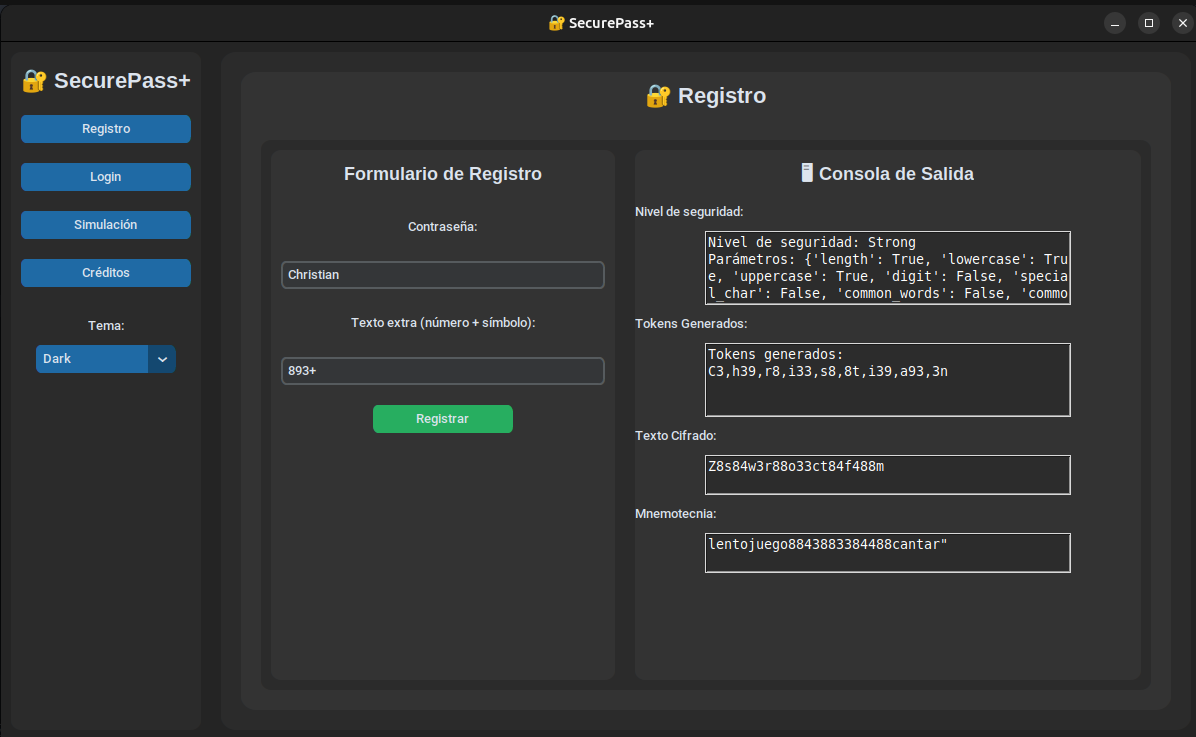

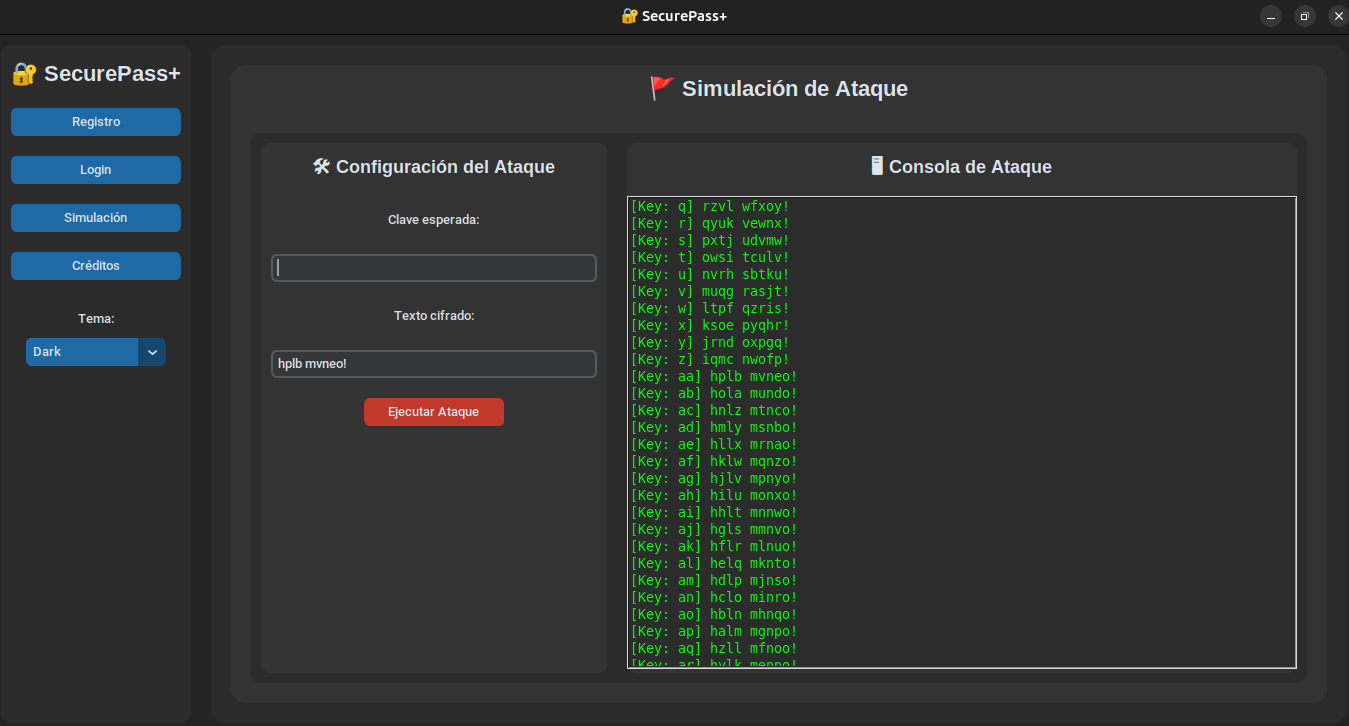

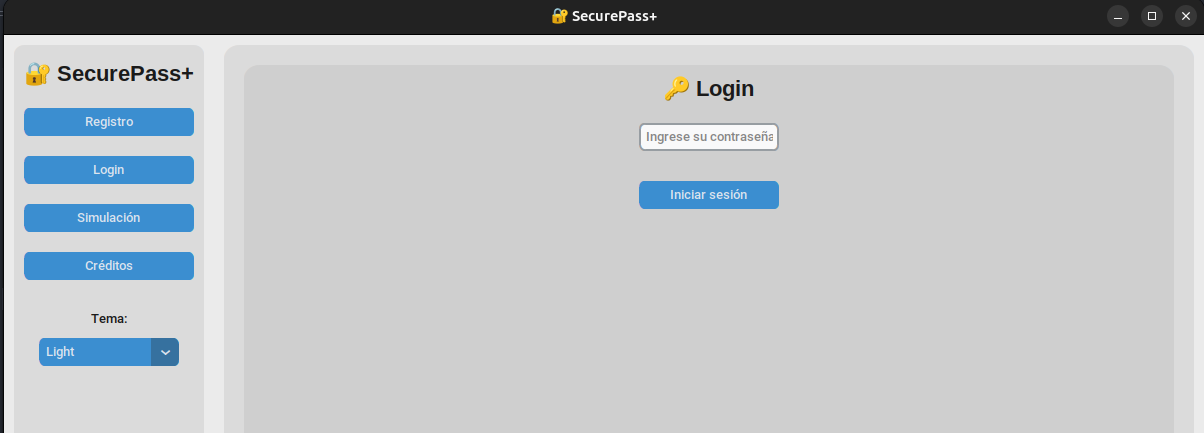